In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mcdonalds.csv')

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
yummy             1453 non-null object
convenient        1453 non-null object
spicy             1453 non-null object
fattening         1453 non-null object
greasy            1453 non-null object
fast              1453 non-null object
cheap             1453 non-null object
tasty             1453 non-null object
expensive         1453 non-null object
healthy           1453 non-null object
disgusting        1453 non-null object
Like              1453 non-null object
Age               1453 non-null int64
VisitFrequency    1453 non-null object
Gender            1453 non-null object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [7]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
df['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [9]:
df = df.replace(to_replace='I hate it!-5',value='-5')
df = df.replace(to_replace='I love it!+5',value='+5')

In [10]:
df = df.replace(to_replace=['-5','-4','-3','-2','-1'],value='Bad')
df = df.replace(to_replace=['0','+1','+2'],value='Average')
df = df.replace(to_replace=['+3','+4','+5'],value='Good')

In [11]:
df['yummy'] = df['yummy'].replace({'Yes': 1, 'No': 0})
df['convenient'] = df['convenient'].replace({'Yes': 1, 'No': 0})
df['spicy'] = df['spicy'].replace({'Yes': 1, 'No': 0})
df['fattening'] = df['fattening'].replace({'Yes': 1, 'No': 0})
df['greasy'] = df['greasy'].replace({'Yes': 1, 'No': 0})
df['fast'] = df['fast'].replace({'Yes': 1, 'No': 0})
df['cheap'] = df['cheap'].replace({'Yes': 1, 'No': 0})
df['tasty'] = df['tasty'].replace({'Yes': 1, 'No': 0})
df['healthy'] = df['healthy'].replace({'Yes': 1, 'No': 0})
df['disgusting'] = df['disgusting'].replace({'Yes': 1, 'No': 0})
df['expensive'] = df['expensive'].replace({'Yes': 1, 'No': 0})
df['Like'] = df['Like'].replace({'Bad': -1, 'Good': 1, 'Average':0})
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['VisitFrequency'] = df['VisitFrequency'].replace({'Never': 0, 'More than once a week':1,
                                                   'Once a week': 2, 'Once a month':3, 
                                                   'Every three months':4, 'Once a year':5})

In [12]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-1,61,4,0
1,1,1,0,1,1,1,1,1,1,0,0,0,51,4,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,4,0
3,1,1,0,1,1,1,1,1,0,0,1,1,69,2,0
4,0,1,0,1,1,1,1,0,0,1,0,0,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-1,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,0,36,2,0
1450,1,1,0,1,0,1,0,1,1,0,0,1,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,1,41,4,1


In [13]:
df.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,0.666354,-0.281653,-0.075292,-0.062545
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,0.302333,-0.070597,0.143280,-0.041402
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,-0.023969,0.146217,-0.013707,0.051015
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.157198,-0.139254,0.013628,-0.059707
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,-0.258834,-0.233554,-0.022086,0.021801
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,0.148471,-0.020558,0.003175,-0.049027
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,0.123818,0.016958,-0.023430,-0.116050
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,0.609818,-0.194576,-0.033031,-0.044385
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,-0.111999,-0.070851,-0.011411,0.144113
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,0.275787,0.021366,-0.032405,-0.042455


In [14]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-1,61,4,0
1,1,1,0,1,1,1,1,1,1,0,0,0,51,4,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,4,0
3,1,1,0,1,1,1,1,1,0,0,1,1,69,2,0
4,0,1,0,1,1,1,1,0,0,1,0,0,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-1,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,0,36,2,0
1450,1,1,0,1,0,1,0,1,1,0,0,1,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,1,41,4,1


In [15]:
df.mean()

yummy              0.552650
convenient         0.907777
spicy              0.093599
fattening          0.867171
greasy             0.526497
fast               0.900206
cheap              0.598761
tasty              0.644184
expensive          0.357880
healthy            0.198899
disgusting         0.242946
Like               0.081900
Age               44.604955
VisitFrequency     3.075705
Gender             0.457674
dtype: float64

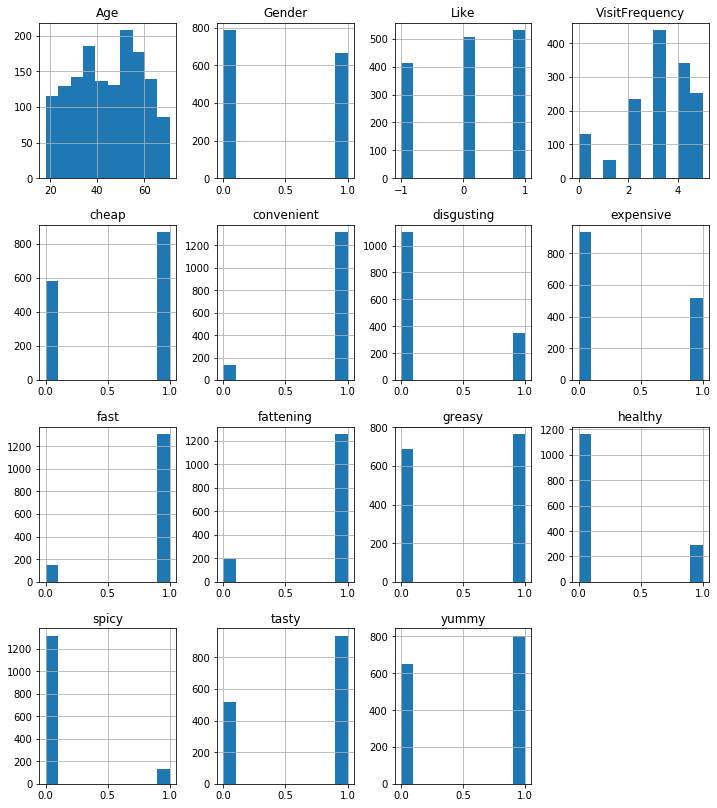

In [16]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

# Exploring through PCA

In [17]:
#Considering only first 11 attributes
df_eleven = df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [18]:
#Considering only the 11 cols and converting it into array
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]], dtype=int64)

In [19]:
#Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [20]:
#Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [21]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [22]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


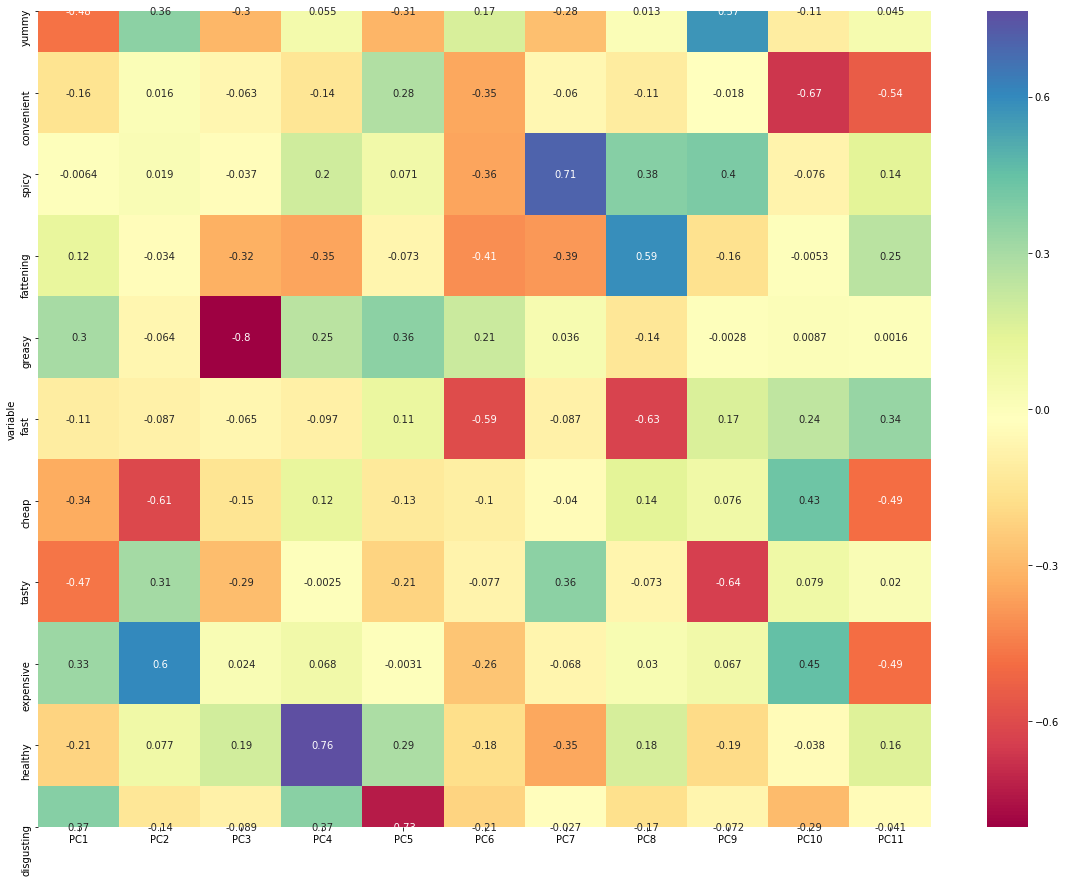

In [23]:
#Correlation matrix plot for loadings 
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

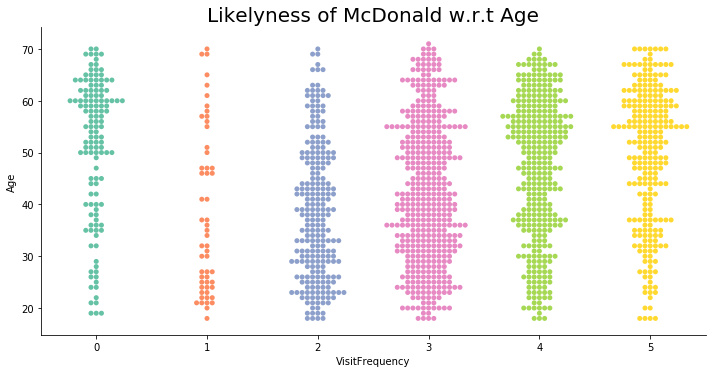

In [24]:
sns.catplot(data=df, x="VisitFrequency", y="Age", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

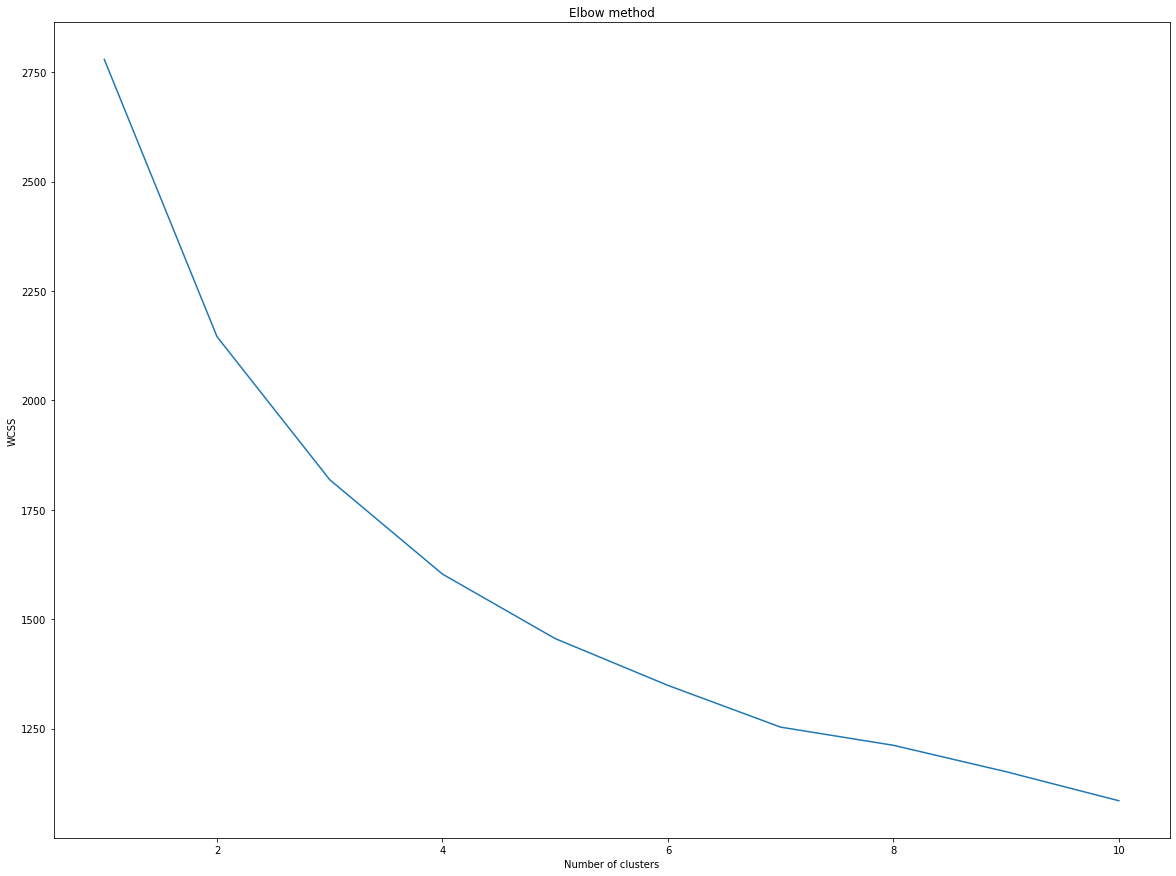

In [25]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


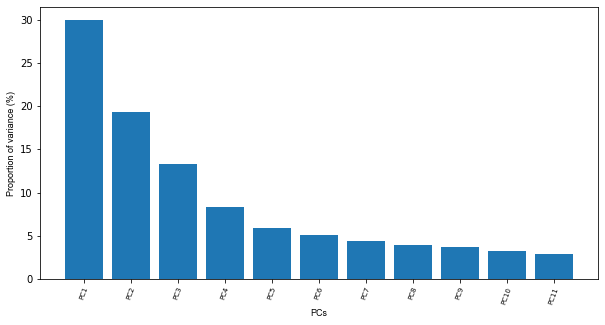

NameError: name 'data' is not defined

In [26]:
!pip install bioinfokit
#Scree plot (Elbow test)- PCA

from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

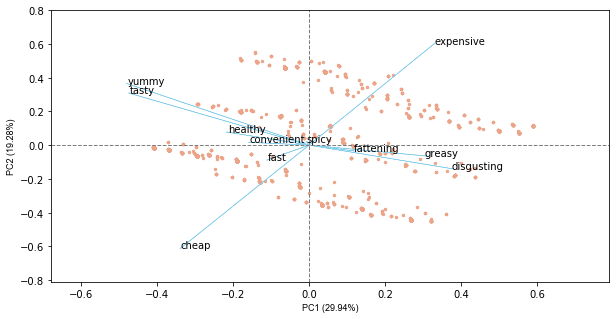

In [27]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))